# This file creates slice from the raw data. Just provide the path for the data.

In [1]:
import yt
import numpy as np
from yt.visualization.base_plot_types import get_multi_plot
import matplotlib.colorbar as cb
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.colors as colors
%matplotlib inline

In [2]:
plt.rcParams['font.size']=25
plt.rcParams['axes.linewidth']=2.5
plt.rcParams['xtick.major.size']=15
plt.rcParams['xtick.minor.size']=10
plt.rcParams['xtick.major.width']=2
plt.rcParams['xtick.minor.width']=1
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.major.size']=10
plt.rcParams['ytick.minor.size']=5
plt.rcParams['ytick.major.width']=2
plt.rcParams['ytick.minor.width']=1
plt.rcParams['ytick.direction']='in'

In [3]:
#Path = Data_Directory/Different_Runs/Time_Steps
base    = "/mnt/lustre/ast2/astadit/CGM/Pyxsim/Data/" #path to data directory
folder   = ["HR_0821_1e-6_SFR3/", "HR_0821_n6e-5_T1e6_hse_SFR10_Rsf2kpc/" ] #folder with runs names


filename = ["DD0300/sb_0300", "DD0130/sb_0130"]

run_name =[ r'n1e-6$\Sigma$3M$_{\odot}$' , r'n6e-5$\Sigma$10M$_{\odot}$']

In [4]:
num = len(folder)
bins = 512
slc_dens = np.zeros((num, bins, bins))
slc_temp = np.zeros((num, bins, bins))
slc_rvel = np.zeros((num, bins, bins))
slc_met  = np.zeros((num, bins, bins))

for i in range(num):
    file_loc = base + folder[i] + filename[i] 
    ds       = yt.load(file_loc)
    slc      = yt.SlicePlot(ds, 'x', fields=["density","temperature","radial_velocity", "metallicity"])

    slc_frb  = slc.data_source.to_frb((100.0, "kpc"), bins)

    slc_dens[i,:] = np.array(slc_frb['density'])
    slc_temp[i,:] = np.array(slc_frb['temperature'])
    slc_rvel[i,:] = np.array(slc_frb['radial_velocity'])
    slc_met[i,:]  = np.array(slc_frb['metallicity'])




yt : [INFO     ] 2020-06-01 13:32:39,135 Parameters: current_time              = 3000.0001595029
yt : [INFO     ] 2020-06-01 13:32:39,136 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2020-06-01 13:32:39,138 Parameters: domain_left_edge          = [-4. -4. -4.]
yt : [INFO     ] 2020-06-01 13:32:39,139 Parameters: domain_right_edge         = [4. 4. 4.]
yt : [INFO     ] 2020-06-01 13:32:39,140 Parameters: cosmological_simulation   = 0.0
Parsing Hierarchy : 100%|██████████| 481/481 [00:00<00:00, 4640.30it/s]
yt : [INFO     ] 2020-06-01 13:32:39,291 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-06-01 13:33:02,331 xlim = -4.000000 4.000000
yt : [INFO     ] 2020-06-01 13:33:02,332 ylim = -4.000000 4.000000
yt : [INFO     ] 2020-06-01 13:33:02,333 xlim = -4.000000 4.000000
yt : [INFO     ] 2020-06-01 13:33:02,334 ylim = -4.000000 4.000000
yt : [INFO     ] 2020-06-01 13:33:02,335 Making a fixed resolution buffer of (('gas', 'density')) 800 by 8

In [5]:
x = np.linspace(-50.,50, bins)
y = x

/mnt/lustre/ast2/astadit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/mnt/lustre/ast2/astadit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/mnt/lustre/ast2/astadit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a pr

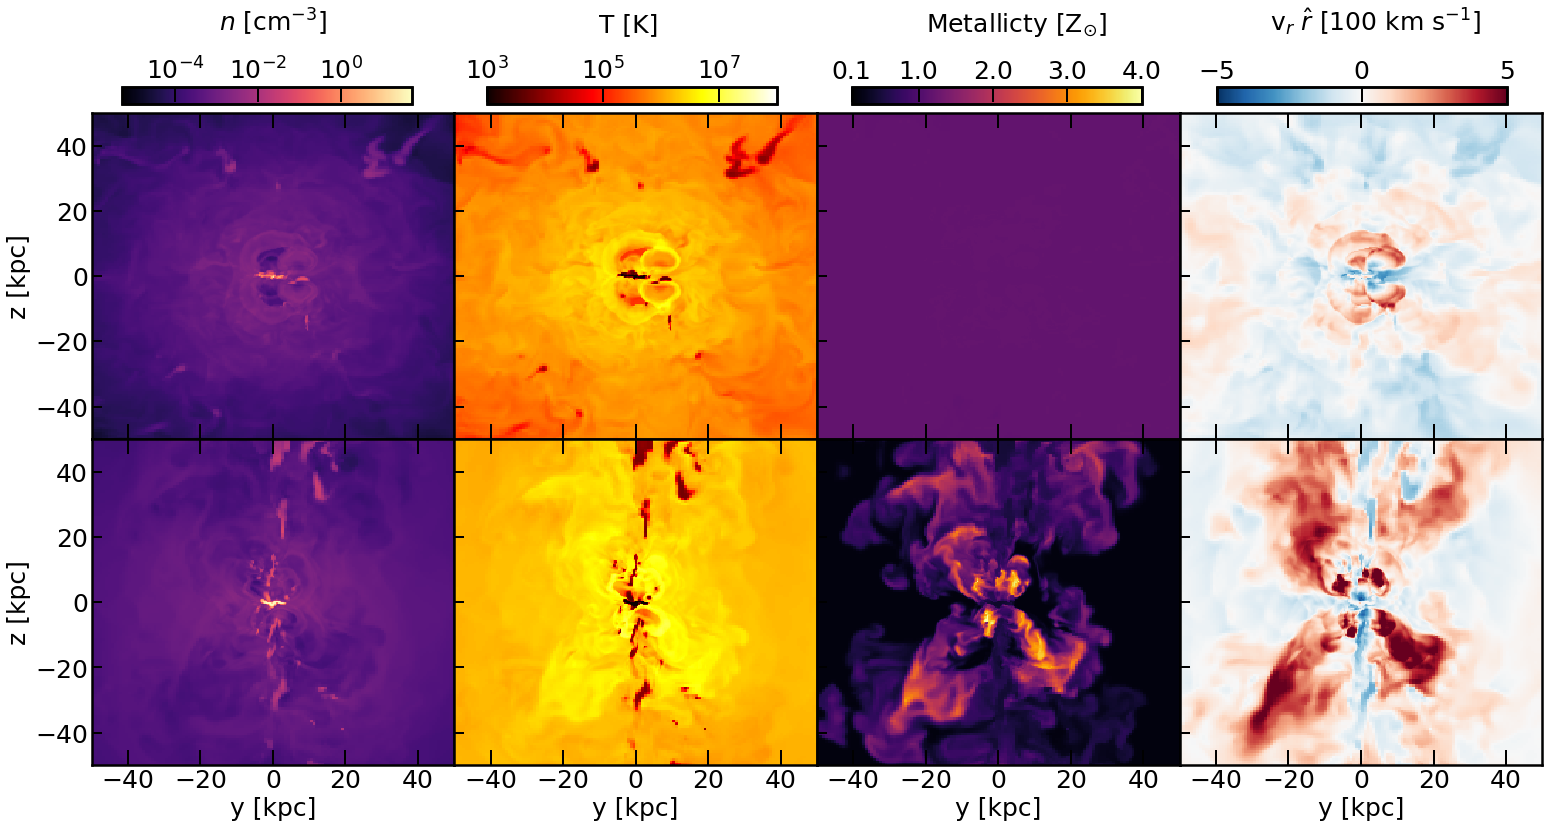

In [6]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

majorLocator = MultipleLocator(2)
majorFormatter = FormatStrFormatter('%d')

f, ax = plt.subplots(2, 4, gridspec_kw = {'wspace':0.00, 'hspace':0.00},figsize=(26,12))

cbarx = 0.141 
cbheight = 0.02
cbary = 0.89
cblen = 0.155
dx = 0.04

cbtitlex = 0.1
cbtitley = 16.5

mp = 1.67e-24

for j in range(2):
    plot = ax[j,0].pcolormesh(x,y,slc_dens[j,:,:]/mp, norm=colors.LogNorm(vmin=5e-6, vmax=5.e1),
                   cmap='magma')
    cax = f.add_axes([cbarx, cbary, cblen, cbheight])
    f.colorbar(plot, cax=cax, orientation='horizontal', ticks=(1.e-4,1.e-2, 1., 1.e+2))
    # ticks=(1.e-28,1.e-26, 1.e-24, 1.e-22))
    cax.xaxis.set_ticks_position('top')
    
    plot = ax[j,1].pcolormesh(x,y,slc_temp[j,:,:], norm=colors.LogNorm(vmin=1.e3, vmax=1.e8),
                   cmap='hot')
    cax = f.add_axes([cbarx+dx+cblen, cbary, cblen, cbheight])
    f.colorbar(plot, cax=cax, orientation='horizontal', ticks=(1.e3, 1.e5, 1.e7 ))
    cax.xaxis.set_ticks_position('top')
#     cax.text(cbtitlex, cbtitley, r"T [K]")
    
    
    plot = ax[j,2].pcolormesh(x,y,slc_met[j,:,:], vmin=0.1, vmax=4.,cmap='inferno')
#     norm=colors.LogNorm(vmin=0.1, vmax=3.5),
#                    cmap='inferno')
    cax = f.add_axes([cbarx+2.*(cblen+dx), cbary, cblen, cbheight])
    f.colorbar(plot, cax=cax, orientation='horizontal',  ticks=(0.1, 1.0, 2.0, 3.0, 4.0))
    cax.xaxis.set_ticks_position('top')
#     cax.text(0.25, cbtitley, r"Metallicty [Z$_{\odot}$]")
    
    plot = ax[j,3].pcolormesh(x,y,slc_rvel[j,:,:]/1.e7, vmin=-5., vmax=5.,
                   cmap='RdBu_r')
    cax = f.add_axes([cbarx+dx+3*(cblen)+2*dx, cbary, cblen, cbheight])
    f.colorbar(plot, cax=cax, orientation='horizontal')
    cax.xaxis.set_ticks_position('top')
#     cax.text(0.5, cbtitley, r"v$_r$ $\hat{r}$ [100 km s$^{-1}$]")
    
    ax[j,i].tick_params(axis='x', top=True)    
    
    for i in range(4):
        ax[j,i].tick_params(axis='y', labelleft=False)
        ax[j,i].tick_params(axis='x', labelbottom=True)
        ax[j,i].tick_params(axis='x', top=True)
        ax[j,i].set_xticks((-40,-20,0,20,40))     
         
    ax[j,0].set_yticks((-40,-20,0,20,40))  
    ax[j,0].tick_params(axis='y', which = 'minor', bottom=True) 
    ax[j,0].tick_params(axis='y', labelleft=True)
    
ax[0,0].text(-15., 75., r"$n$ [cm$^{-3}$]")
ax[0,1].text(-10., 75., r"T [K]")
ax[0,2].text(-20., 75., r"Metallicty [Z$_{\odot}$]")
ax[0,3].text(-25., 75., r"v$_r$ $\hat{r}$ [100 km s$^{-1}$]")

                   
plt.setp(ax[1,:], 'xlabel', (r'y [kpc]'))
plt.setp(ax[:,0], 'ylabel', (r'z [kpc]'))



# plt.savefig('slice_plots.png', bbox_inches= 'tight', dpi=160)
plt.show()